#  Neural Network X-Ray scans from patients with pneumonia. 

# Importing Libraries

In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


# Understanding the folder structures

In [2]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)

['train', '.DS_Store', 'val', 'test']


# The data is divided by three different folders:
   
1. train= contains the training data/images for teaching our model.
2.  val= contains images which we will use to validate our model. The purpose of this data set is to prevent our model from **Overfitting**. Overfitting is when your model gets a little too comofortable with the training data and can't handle data it hasn't see....too well.
3. test = this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia)

       
    
    

In [3]:
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'

## Let's set up the training and testing folders.


In [4]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

## Let's take a look at some of the pictures.



Total pictures 1296
Normal picture title:  NORMAL2-IM-0395-0001-0002.jpeg
Pneumonia picture title: person540_bacteria_2273.jpeg


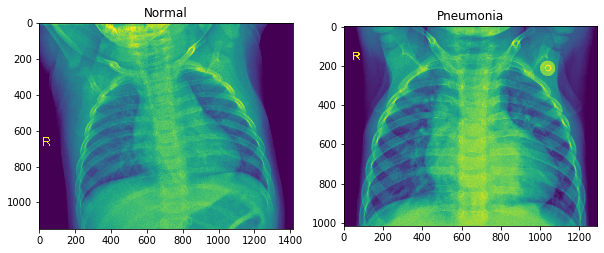

In [5]:
#Normal pic 
print(f'Total pictures {len(os.listdir(train_n))}')
rand_norm = np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('Normal picture title: ', norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('Pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)

img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

plt.show()

**The above pictures are being generated randomly from the dataset. There are slight differences in the pictures, but  let's see if we can't create a Convolutional Neural Network which can create a more objective measure of quantifying and classifying these differences. **

# Keras Library 
### Convolutional Neural Networks are easy to build and run because of the deep learning libraries such as Keras 
* **Keras** is a high level deep learning library. 
* It runs on top of more low level libraries such as Tensorflow which is why you will usually see that message. 'Using TensorFlow backend.' display when you call Keras.
* I am going to build a CNN that has 2 Convolution layers. After each convolution, I will add a Pooling layer using max-pooling. 
* After the second convolutional layer, we will add 2 Fully Connected layers which will take out feature map of an image and make predictions about it. The second FC  
   has only 1 unit becuase it needs to predict if someone has pneumonia. 
 * When we compile this CNN, we will use the Adam optimization fuction which optimizes how fast our model learns the correct classification of the image.                         Optimization functions are far too complex for me to get into in this post. 


In [6]:
# let's build the CNN model
model = Sequential()

#Convolution
model.add(Conv2D(128, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
model.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Now, we are going to fit the model to our training dataset and we will keep out testing dataset seperate

In [7]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.3, rotation_range=25,
                                   width_shift_range=.2, height_shift_range=.2,
                                   fill_mode='nearest',
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('./chest_xray/val/',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5124 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Looking the structure of the Net

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

Cool. Now that it's all ok, lets use the fit_generator to run the trainning

# Compiling our model 

In [9]:
cnn_model = model.fit_generator(training_set,
                                steps_per_epoch = 163, # tot_imgs / Batch_size
                                epochs = 10, 
                                validation_data = validation_generator,
                                validation_steps = 624)


Epoch 1/10
163/163 [==============================] - 193s 1s/step - loss: 0.5634 - accuracy: 0.7467 - val_loss: 0.5088 - val_accuracy: 0.8426
Epoch 2/10
163/163 [==============================] - 193s 1s/step - loss: 0.4585 - accuracy: 0.7868 - val_loss: 0.4720 - val_accuracy: 0.7407
Epoch 3/10
163/163 [==============================] - 194s 1s/step - loss: 0.3718 - accuracy: 0.8285 - val_loss: 0.1355 - val_accuracy: 0.7407
Epoch 4/10
163/163 [==============================] - 192s 1s/step - loss: 0.3586 - accuracy: 0.8360 - val_loss: 0.3029 - val_accuracy: 0.9352
Epoch 5/10
163/163 [==============================] - 190s 1s/step - loss: 0.3270 - accuracy: 0.8531 - val_loss: 0.2177 - val_accuracy: 0.8981
Epoch 6/10
163/163 [==============================] - 189s 1s/step - loss: 0.3207 - accuracy: 0.8612 - val_loss: 0.2600 - val_accuracy: 0.9352
Epoch 7/10
163/163 [==============================] - 199s 1s/step - loss: 0.3019 - accuracy: 0.8678 - val_loss: 0.1059 - val_accuracy: 0.916

In [10]:
test_accu = model.evaluate_generator(test_set,steps=624)

In [11]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 86.85291409492493 %


# Train Accuracy and Validation Accuracy

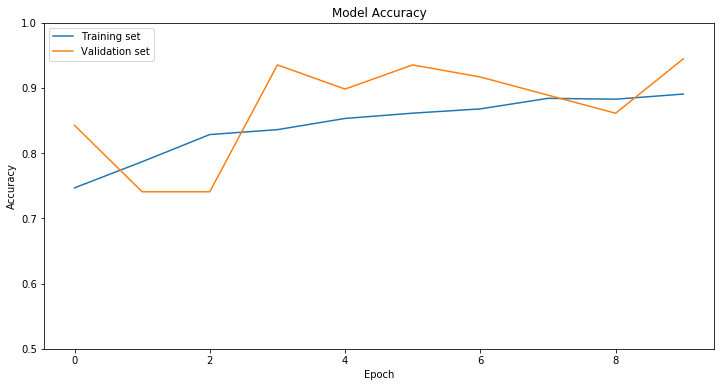

In [18]:
# Accuracy 
plt.figure(figsize=(12,6))
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(.5, 1)
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Train Loss and Validation Loss

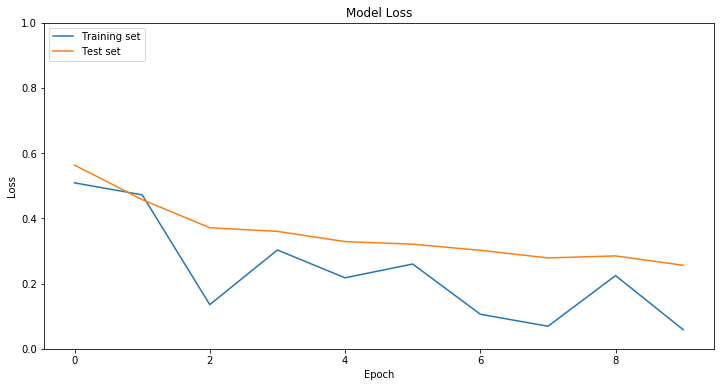

In [17]:
# Loss 
plt.figure(figsize=(12,6))
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()